In [1]:
import time
import random

# set seed
random.seed(a=100)

# create default lislt
short_list = list(random.sample(range(100000), 10))
long_list = list(random.sample(range(1000000), 10000))

# Sorting
[Sorting Algorithm Wiki](https://en.wikipedia.org/wiki/Sorting_algorithm)

__Algorithim__: set of steps necessary for a computer to accomplish a specific task

__Two Lists:__ return list ordered from smallest to largest in least amount of time
- short_list: use to validate algorithim
- long_list: use to compare computation time across sorting strategies
- Duplicates maintain original order (preserves algorithim stability)
- Efficiency: measured in runtime, also discussed in terms of steps

## Example: Sorting a hand of cards
- Sorting makes it easier to to know what cards are in your hand and makes accessing them easier
- Can sort by: 
    - One card at a time, sequencing as you go
    - move through hand, organizing card by card
    - Random Shuffling until they are sorted (obviously inefficient method)
- Different methods work best for different games & different sized hands

## Insertion Sort
- Maintain two lists: original list, and new list that will be ordered
- Take elements from original list and move through new list, stopping and inserting element where it goes
    - Place in position ahead of the first element in the new list larger than the chosen element
    - if none are larger, then it is added to the end
    
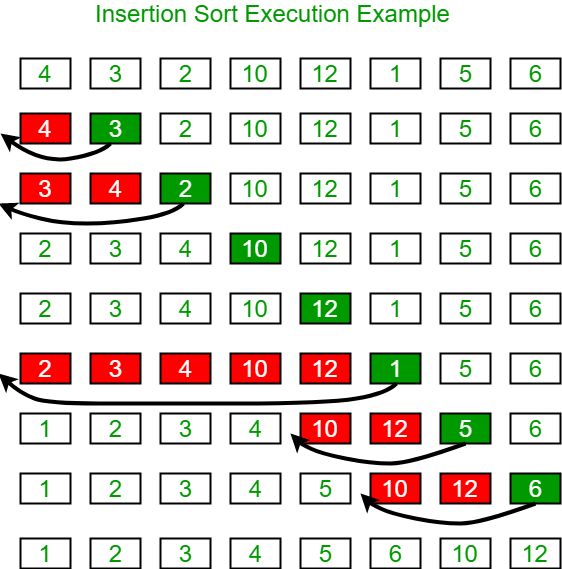

In [2]:
def insert_sort(input_list):
    # copy input into a new list, leave original unmodified
    new_list = input_list
    
    # iterate thru the list
    for i in range(len(new_list)):
        # assign the place to a variable
        j = i
        
        # move thru the list as long as the previous element is larger
        # than the current element
        while j > 0 and new_list[j - 1] > new_list[j]:
            
            # Swap places when condition is met:
            new_list[j - 1], new_list[j] = new_list[j], new_list[j - 1]
            
            # reduce j by one
            j = j - 1
        
    return new_list

In [3]:
start_time = time.time()

# Run insertion sort function
insert_sort(short_list)

# print results and runtime
print('%s seconds' % (time.time() - start_time))
print(insert_sort(short_list))

0.00016570091247558594 seconds
[19093, 22904, 45840, 51515, 56821, 59628, 60231, 66435, 92473, 95939]


In [4]:
# test on long list
start_time = time.time()

insert_sort(long_list)
print('%s seconds' % (time.time() - start_time))

8.275357246398926 seconds


- Sorting works, but doesnt scale very well
- if list is already ordered:
    - this sort takes n steps to complete
    - iterates through list
- if list is perfectly out of order:
    - Can take asymptotially n-squared, or  $\mathcal{O}(n^2)$ in big O notation
    - Have _n_ elements and algorithim looks through each element in sorted list before inserting the element
    - Computational intensity increases very quickly

## Merge Sort

- Merging two small sorted lists into one large sorted list is faster
- Overview
    - Breaks large list into single element sublists (which are inherently ordered)
    - Merges single element lists into ordered pairs, reading from one end to preserve order
    - repeats this process to arrive at a sorted list
    
### Example: 
List = [3, 7, 2, 4]

Step 1: [3], [7], [2], [4]

Step 2: [3, 7], [2, 4]

Step 3: [2, 3, 4, 7]

- Any merge only to have to look at the leading entry from each prior list
 - Final merge only compares 3 to 2, since its already known that 4 and 7 are larger than their prior entries
 - dont ahve to handle large amounts of unordered data
 - __divide and conquer technique__
     - Insertion sort attempts to solve the whole problem in one piece
     - Breaking task into smalle rones provides significant efficiency gains


In [12]:
# Our merge function takes two ordered lists and merges them together into one ordered list

def merge(a, b):
    # Check for empty list.
    if len(a) == 0 or len(b) == 0:
        return a or b
    
    # Start with an empty result.
    result = []
    # Track two indexes.
    i, j = 0, 0
    # Set a while condition to ensure we iterate only for the length of our two lists.
    while (len(result) < len(a) + len(b)):
        # If a's next element is lower append that element to our result.
        if a[i] < b[j]:
            result.append(a[i])
            i += 1
        # Otherwise append b's next element.
        else:
            result.append(b[j])
            j += 1
        # When one list is empty just append everything from the other list and stop.
        if i == len(a) or j == len(b):
            result.extend(a[i:] or b[j:])
            break 

    return result

def merge_sort(lst):
    if len(lst) < 2:
        return lst

    mid = int(len(lst) / 2)
    a = merge_sort(lst[:mid])
    b = merge_sort(lst[mid:])

    return merge(a, b)
    

In [13]:
# Test on short list.
# Start timer.
start_time = time.time()

# Run our insertion sort.
merge_sort(short_list)

# Print time to show runtime.
print("--- %s seconds ---" % (time.time() - start_time))
print(insert_sort(short_list))

--- 0.00010895729064941406 seconds ---
[19093, 22904, 45840, 51515, 56821, 59628, 60231, 66435, 92473, 95939]


In [14]:
# Test on long list.
start_time = time.time()

merge_sort(long_list)

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.08464813232421875 seconds ---


This algorithim is recursive: 
- Function nests within itself and runs until stopping condition is met
- This creates multiple layers of lists to merge together
- Common feature, way to keep algorithim running until the problem is solved without having to specify the number of times something should run
- Much faster and less complex than insertion sort
    - $\mathcal{O}(n\log{}n)$ instead of $\mathcal{O}(n^2))$.
    - scaling is quasilinear instead of quadratic
    

## Default Sort¶
Python has a built in .sort() and .sorted() methods

- Efficient: written in version of C from Python called Cython
- Faster than generic Python

In [15]:
start_time = time.time()

sorted(long_list)
print('{:.10f} seconds'.format(time.time() - start_time))

0.0003829002 seconds


# Drill

Pick an algorithim from the wiki page (sticking to simpler ones), implement it in Python, and see how sorting short & long lists compares


## Quicksort
- divide and conquer algorithim
- relies on a partition operation
    - __pivot:__ element selected to partitiona an array
    - All elements before the pivot are moved before it, greater elements moved after it
    - lesser & greater sublists are recursively sorted
    - $\mathcal{O}(n\log{}n)$
        - Caveat: $\mathcal{O}(n^2)$ for worst case

In [16]:
# create lists again
# otherwise will get first hand experience with worst case complexity
# works on short list but long list hits recursion limit
short_list = list(random.sample(range(1000000), 10))
long_list = list(random.sample(range(1000000), 10000))

def quicksort(lst):
    quick_sorter(lst, 0, len(lst) - 1)

def partition(lst, low, high):
    # set first element as pivot
    pivot = lst[low]
    #set left & right markers
    left = low + 1
    right = high
    
    while not False:
        while left <= right and lst[left] <= pivot:
            left += 1
        while lst[right] >= pivot and right >= left:
            right -= 1
        # unless we're done, swap left & right    
        if right < left:
            break
        else:
            lst[left], lst[right] = lst[right], lst[left]
            
    lst[low], lst[right] = lst[right], lst[low]
    return right

def quick_sorter(lst, low, high):
    if low < high:
        partition_index = partition(lst, low, high)
        #sort elements before and after partition index
        quick_sorter(lst, low, partition_index - 1)
        quick_sorter(lst, partition_index + 1, high)

In [17]:
start_time = time.time()
quicksort(short_list)
print('{:.10f} seconds'.format(time.time() - start_time))
print(short_list)

0.0001149178 seconds
[142308, 203147, 278987, 322428, 393382, 484317, 734720, 741252, 820597, 966692]


In [18]:
start_time = time.time()
quicksort(long_list)
print('{:.10f} seconds'.format(time.time() - start_time))
print(long_list[:25])

0.0480558872 seconds
[196, 221, 424, 563, 638, 764, 811, 870, 871, 906, 1154, 1178, 1189, 1332, 1378, 1391, 1406, 1515, 1532, 1675, 1831, 1924, 1935, 1955, 1964]
